In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

In [7]:
# Signal generation
nSamples = 128;

t = np.linspace(0, 2*np.pi, nSamples)
signal = 0.6*np.cos(t)+0.2*np.sin(5*t)+0.3*np.cos(39*t)+0.1*np.cos(28*t)

Signal has points below -1. Signal has been scaled to min value equal to -1.
Signal frequency = 78.125 Hz


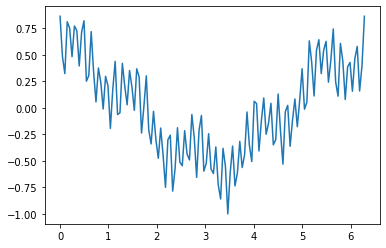

In [8]:
# Saturate signal 

if max(signal)>1:
    signal = signal/max(signal)
    print("Signal has points above 1. Signal has been scaled to max value equal to 1.")

if min(signal)<(-1):
    signal = signal/abs(min(signal))
    print("Signal has points below -1. Signal has been scaled to min value equal to -1.")
    
plt.plot(t,signal)

fUpdate = 100e6/10000
fSignal = fUpdate/nSamples
print("Signal frequency = "+ str(fSignal)+" Hz")

/usr/lib/python3/dist-packages/ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """


<StemContainer object of 3 artists>

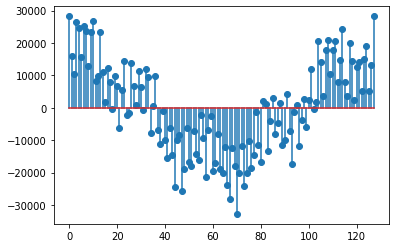

In [9]:
# quantificate signal
nBits = 16

signal_quantified = np.floor(signal*2**(nBits-1))
plt.stem(signal_quantified)

In [10]:
#write hexadecimal values
filename = "../memory_content/signal3.mem"

file = open(filename, 'w')

for i in range (0,nSamples):
    if signal_quantified[i] < 0:
        signal_to_write = signal_quantified[i] + 2**nBits
    else:
        signal_to_write = signal_quantified[i] 
        
    file.write(format(int(signal_to_write),'x') + ' ')

file.close()